<a href="https://colab.research.google.com/gist/Robson-Passos/7696f490fa14a7bedba118dddd10a628/plotando-dados-de-arquivos-netcdf-em-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotando dados de arquivos NetCDF em Python

<h3>Vídeo anterior:</h3>

<ul>
<h3><li><a href='http://www.meteopassos.com/manipulando-arquivos-netcdf-em-python-xarray'>
    Manipulando arquivos NetCDF em Python (Xarray)</a></li></h3>
</ul>

### Fazendo as importações necessárias

In [0]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

### Abrindo o arquivo netCDF

In [0]:
ds = xr.open_dataset('uvt_2019.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 4, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-22 13:19:59 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### Convertendo as longitudes de 0 a 360 para -180 a 180

In [0]:
ds.coords['longitude'] = ((ds.coords['longitude'] + 180) % 360) - 180
ds = ds.sortby(ds.longitude)
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 4, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 208.47557 ... 264.55545
    u          (time, level, latitude, longitude) float32 -0.00032806396 ... -0.00032806396
    v          (time, level, latitude, longitude) float32 0.0023585558 ... -3.886223e-05
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-22 13:19:59 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### Extraindo as variáveis

In [0]:
u = ds['u']  #u = ds.u
v = ds['v']
wspd = (u**2 + v**2)**(0.5)
t = ds['t'] - 273.15

In [0]:
t

<xarray.DataArray 't' (time: 12, level: 4, latitude: 721, longitude: 1440)>
array([[[[-64.67442 , ..., -64.67442 ],
         ...,
         [-46.274536, ..., -46.274536]],

        ...,

        [[-27.402206, ..., -27.402206],
         ...,
         [ -7.252686, ...,  -7.252686]]],


       ...,


       [[[-65.10016 , ..., -65.10016 ],
         ...,
         [-46.40747 , ..., -46.40747 ]],

        ...,

        [[-26.270508, ..., -26.270508],
         ...,
         [ -8.594543, ...,  -8.594543]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00

### Gerando um mapa global com os dados de temperatura

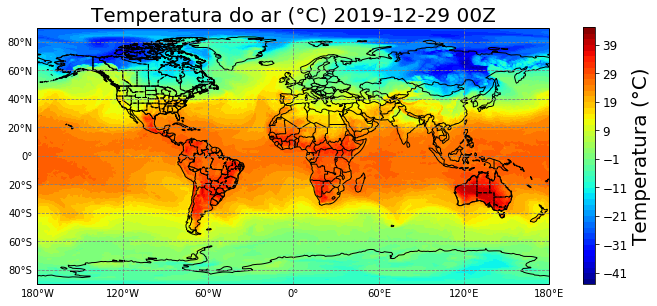

In [0]:
#Criando um objeto de figura para receber o mapa
fig = plt.figure(figsize=(10, 8))

#Criando um eixo com uma determinada projeção
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

#Criando matrizes de longitude e latitude
lon, lat = np.meshgrid(t.longitude, t.latitude)

#Plotando a temperatura do ar para o globo todo
im = ax.contourf(lon, lat, t.isel(time=0, level=3), 
                 levels=np.arange(-45, 46, 2), cmap='jet',
                 transform=ccrs.PlateCarree())

#Inserindo uma colorbar
cbar = plt.colorbar(im, ax=ax, pad=0.06, fraction=0.023)
cbar.set_label(label='Temperatura (°C)', size=20)
cbar.ax.tick_params(labelsize=12)

#Adicionando o contorno dos continentes
ax.add_feature(cfeature.COASTLINE)

#Adicionando os limites dos países
ax.add_feature(cfeature.BORDERS)

#Adicionando os limites estaduais
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_shp',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='k', linestyle='--')

#Adicionando o título da figura
ax.set_title('Temperatura do ar (°C) 2019-12-29 00Z', fontsize=20)

#Adicionando as linhas de grade
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Removendo os labels do topo e da direita
g1.ylabels_right = False
g1.xlabels_top = False

#Formatando os labels como latitude e longitude 
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

#Salvando o mapa como uma figura
plt.savefig('Mapa_temp_global.png', dpi=300, bbox_inches='tight')

### Gerando um mapa da AS com as linhas de corrente

In [0]:
#Extraindo um subset da América do Sul
u_as = u.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
v_as = v.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
wspd_as = wspd.sel(longitude=slice(-90, -20), latitude=slice(10, -60))

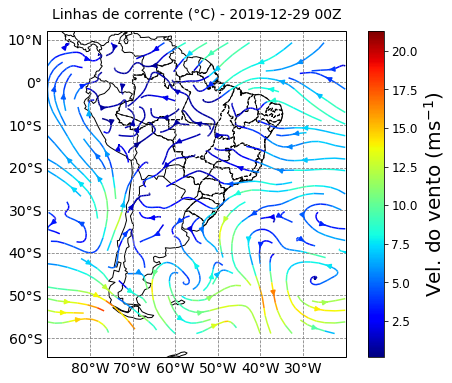

In [0]:
#Criando um objeto de figura para receber o mapa
fig = plt.figure(figsize=(8, 6))

#Criando um eixo com uma determinada projeção
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

#Definindo a extensão do mapa
ax.set_extent([-90, -20, 10, -60])

#Criando matrizes de longitude e latitude
lon, lat = np.meshgrid(u_as.longitude, u_as.latitude)

#Plotando as linhas de corrente e a intensidade do vento
strm = ax.streamplot(lon, lat, u_as.isel(time=0, level=3).values, v_as.isel(time=0, level=3).values,
                     color=wspd_as.isel(time=0, level=3).values, cmap='jet', 
                     transform=ccrs.PlateCarree())

#Inserindo uma colorbar
cbar = fig.colorbar(strm.lines)
cbar.set_label(label='Vel. do vento (ms$^{-1}$)', size=20, weight='normal')
cbar.ax.tick_params(labelsize=12)

#Adicionando o contorno dos continentes
ax.add_feature(cfeature.COASTLINE)

#Adicionando os limites dos países
ax.add_feature(cfeature.BORDERS)

#Adicionando os limites estaduais
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_shp',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='k', linestyle='--')

#Adicionando o título da figura
ax.set_title('Linhas de corrente (°C) - 2019-12-29 00Z', fontsize=14, y=1.02)

#Adicionando as linhas de grade
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Removendo os labels do topo e da direita
g1.ylabels_right = False
g1.xlabels_top = False

#Formatando os labels como latitude e longitude 
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

#Mofificando o tamanho da fonte dos labels 
g1.xlabel_style = {'size': 14}
g1.ylabel_style = {'size': 14}

#Salvando o mapa como uma figura
plt.savefig('Mapa_streamlines_AS.png', dpi=300, bbox_inches='tight')